In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

from logr_pspfgp import Logr_pspfgp

In [2]:
PATH = PATH = "../../../../data-mining-file/"
levels = ("0-4","5-12","13-22")

In [3]:
with open(PATH+"train_dfs_std_pca.pickle", "rb") as f:
    train_dfs_std_pca = pickle.load(f)
    
with open(PATH+"train_dfs_std_vif.pickle", "rb") as f:
    train_dfs_std_vif = pickle.load(f)
    
with open(PATH+"train_dfs_min_max.pickle", "rb") as f:
    train_dfs_min_max = pickle.load(f)

targets = pd.read_csv(PATH+"target.csv")

## Model using train_dfs_std_vif

In [4]:
train_dfs_std_vif = pd.concat(list(train_dfs_std_vif.values()),axis=0)
train_dfs_std_vif.sort_index()

,level_group,event_name_nunique,fqid_nunique,room_fqid_nunique,elapsed_time_mean,level_mean,room_coor_x_mean,screen_coor_x_mean,elapsed_time_std,level_std,...,navigate_click_sum,person_click_sum,cutscene_click_sum,object_click_sum,map_hover_sum,notification_click_sum,map_click_sum,observation_click_sum,checkpoint_sum,elapsed_time_sum
session_id,,,,,,,,,,,,,,,,,,,,,
20090312431273200,0-4,-0.005362,2.532688,1.202695,-0.039852,-0.079568,-0.132072,0.139675,-0.038590,-0.407178,...,0.110090,0.392205,-0.711961,-0.363307,1.387493,0.104626,-0.221368,1.074705,-0.077762,-0.035390
20090312431273200,13-22,-0.965213,-1.225996,-0.794791,-0.148806,-1.001298,-0.175949,-0.500241,-0.103123,-0.063506,...,-0.619295,0.050337,-0.847091,-0.426296,-0.471561,-0.080507,-0.669318,-1.117707,-0.053486,-0.143873
20090312431273200,5-12,-0.758225,-1.309504,-0.663615,-0.086738,-0.382479,0.196550,-0.121065,-0.064560,-0.240080,...,-0.355071,-0.586939,-0.160505,-0.431481,-0.448512,-0.268072,-0.131348,-0.943662,-0.070378,-0.086861
20090312433251036,0-4,1.030250,-0.754522,-0.831174,-0.038879,-0.559258,-1.829169,-1.976488,-0.036973,-0.380722,...,-0.714072,-0.712037,0.337737,-0.039301,0.721910,-1.303249,0.529767,0.126273,-0.077762,-0.035577
20090312433251036,13-22,0.554489,0.000000,2.453582,-0.104029,-0.091134,1.601282,0.014185,-0.053006,-3.373130,...,2.317225,1.221533,-0.370402,2.196682,0.000000,0.953647,0.000000,0.352272,-0.053486,-0.014198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22100219442786200,0-4,1.030250,-0.754522,-0.831174,-0.039575,-0.535272,-1.281908,-1.251695,-0.039156,1.288924,...,0.110090,-0.159916,-0.187112,-0.525310,-0.609256,0.104626,0.529767,-0.347944,-0.077762,-0.035155
22100219442786200,5-12,0.673060,-0.710282,-0.663615,-0.085164,-0.204002,-0.171017,-0.442521,-0.063177,0.489977,...,-0.551759,-1.101962,-0.553014,-0.541719,-0.353402,-0.268072,-0.315366,-0.943662,-0.070378,-0.086646
22100221145014656,5-12,0.673060,1.087383,0.918826,0.004318,0.501220,0.721745,0.018441,0.041829,0.641854,...,0.759493,1.129805,-0.160505,1.596884,-0.163183,-0.268072,0.236689,-0.406933,-0.070378,0.046313


In [5]:
clf_vif = Logr_pspfgp()

In [6]:
%%time

clf_vif.fit(train_dfs_std_vif, targets, name = "vif")






CPU times: total: 12.4 s
Wall time: 11.7 s


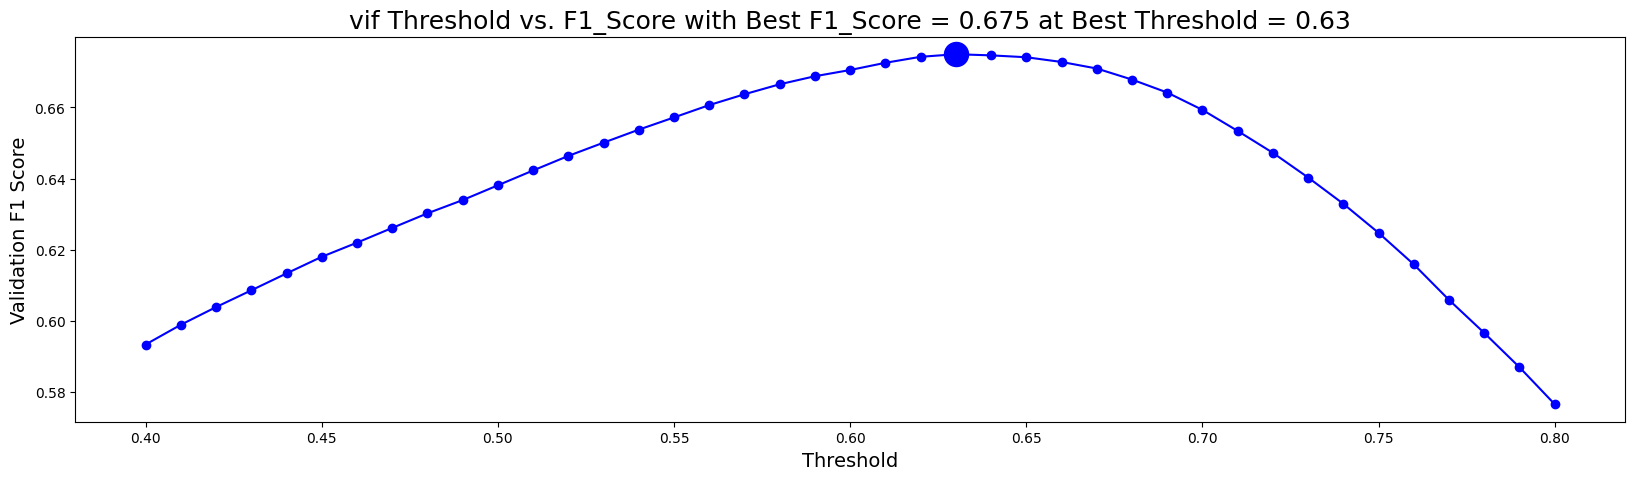

In [7]:
clf_vif.eval_()

In [8]:
clf_vif.f1()

When using optimal threshold...
Q1: F1 = 0.5876246076804009
Q2: F1 = 0.49462711537224113
Q3: F1 = 0.4846941169414623
Q4: F1 = 0.5961035383494386
Q5: F1 = 0.5812773458766018
Q6: F1 = 0.6036710721710872
Q7: F1 = 0.5795424098180659
Q8: F1 = 0.5522426731589217
Q9: F1 = 0.5940860160126412
Q10: F1 = 0.4984355524968601
Q11: F1 = 0.5871856727841699
Q12: F1 = 0.4934518688810864
Q13: F1 = 0.42025490871512233
Q14: F1 = 0.5943909127794614
Q15: F1 = 0.46133849993422005
Q16: F1 = 0.46438970079536324
Q17: F1 = 0.49597182364022463
Q18: F1 = 0.49316201093304524
==> Overall F1 = 0.6749392300956185


## Model using train_dfs_std_PCA

In [9]:
train_dfs_std_pca = pd.concat(list(train_dfs_std_pca.values()),axis=0)
train_dfs_std_pca.sort_index()

,level_group,PC1,PC2,PC3,PC4,PCA5,PCA6,PCA7,PCA8
session_id,,,,,,,,,
20090312431273200,0-4,-0.377238,3.243531,-0.064443,0.225996,-1.998894,-1.068821,-1.390852,-0.023556
20090312431273200,13-22,3.389079,0.494591,-1.460651,0.779441,0.239163,0.037290,-0.341602,-0.228984
20090312431273200,5-12,2.593357,0.068804,-0.615491,0.708380,-0.305940,-0.713534,0.240895,-0.803303
20090312433251036,0-4,0.868446,-1.420645,-0.611651,-2.482628,-0.549174,1.176884,-0.800145,-0.626824
20090312433251036,13-22,-2.584098,1.403760,0.755186,0.875735,-1.771781,0.331121,2.830981,-0.484396
...,...,...,...,...,...,...,...,...,...
22100219442786200,0-4,0.515955,-1.841131,1.857991,-2.789697,0.844123,-0.923586,-1.132844,-0.411511
22100219442786200,5-12,0.620648,-2.897973,1.290353,-0.925083,0.510969,-0.656993,-0.966286,-0.492499
22100221145014656,5-12,-1.613143,0.900163,0.660308,-0.303388,-0.864094,-0.182560,0.596654,1.067851


In [10]:
clf_pca = Logr_pspfgp()

In [11]:
%%time

clf_pca.fit(train_dfs_std_pca, targets, name = "pca")






CPU times: total: 7.03 s
Wall time: 7.4 s


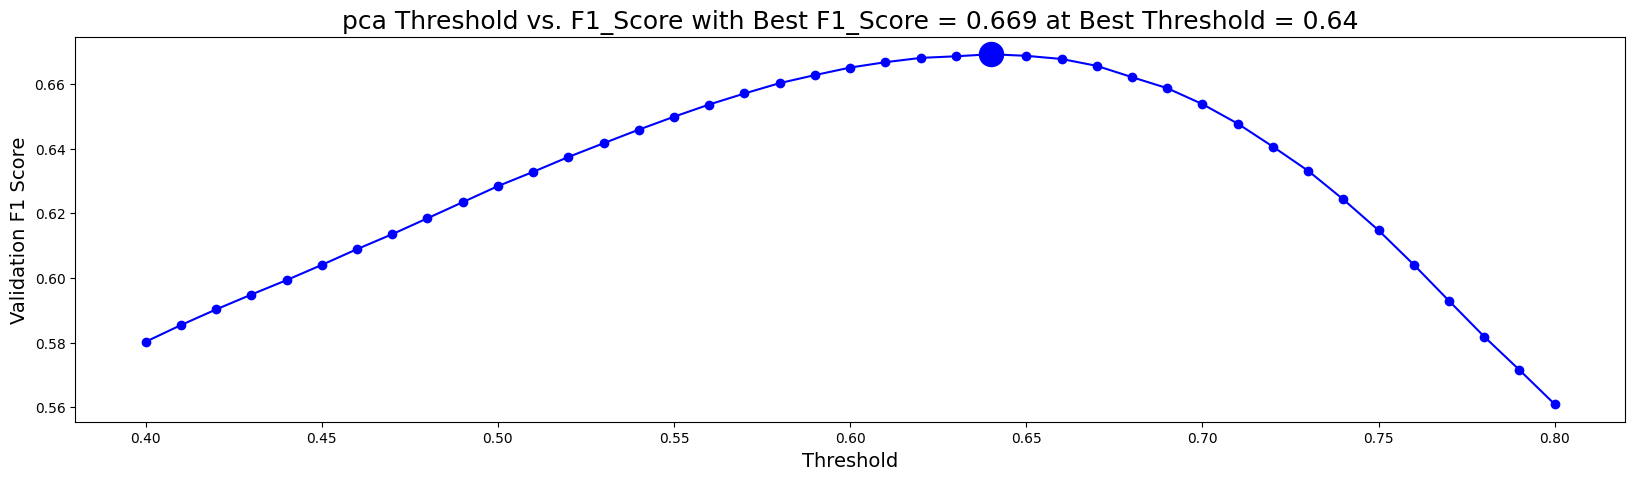

In [12]:
clf_pca.eval_()

In [13]:
clf_pca.f1()

When using optimal threshold...
Q1: F1 = 0.5668180369188405
Q2: F1 = 0.49464879356568364
Q3: F1 = 0.4829379622111523
Q4: F1 = 0.5717529085517299
Q5: F1 = 0.5278088161311215
Q6: F1 = 0.5898462164164454
Q7: F1 = 0.5660750549246236
Q8: F1 = 0.5345322079640292
Q9: F1 = 0.5852891022884985
Q10: F1 = 0.4402824288971333
Q11: F1 = 0.5708998698707581
Q12: F1 = 0.47253367254060047
Q13: F1 = 0.42025490871512233
Q14: F1 = 0.5760460136007167
Q15: F1 = 0.36619219626202987
Q16: F1 = 0.43987678838961036
Q17: F1 = 0.5037177005944428
Q18: F1 = 0.48734796893017995
==> Overall F1 = 0.6691763291327428


## Model using train_dfs_min_max

In [14]:
train_dfs_min_max = pd.concat(list(train_dfs_min_max.values()),axis=0)
train_dfs_min_max.sort_index()

,level_group,event_name_nunique,fqid_nunique,room_fqid_nunique,text_nunique,elapsed_time_mean,level_mean,page_mean,room_coor_x_mean,room_coor_y_mean,...,navigate_click_sum,person_click_sum,cutscene_click_sum,object_click_sum,map_hover_sum,notification_click_sum,map_click_sum,observation_click_sum,checkpoint_sum,elapsed_time_sum
session_id,,,,,,,,,,,,,,,,,,,,,
20090312431273200,0-4,0.75,0.454545,1.000000,0.500000,0.303929,0.488587,0.000000,0.475571,0.396077,...,0.474576,0.625000,0.181818,0.217391,0.666667,0.111111,0.008333,0.571429,0.333333,0.275041
20090312431273200,13-22,0.50,0.263158,0.000000,0.242857,0.272340,0.247621,0.672727,0.465605,0.569862,...,0.204396,0.473684,0.148936,0.224490,0.254545,0.044444,0.006061,0.000000,0.000000,0.165203
20090312431273200,5-12,0.50,0.200000,0.333333,0.305085,0.274705,0.418475,0.000000,0.548904,0.441038,...,0.258373,0.263889,0.200000,0.170455,0.300000,0.015625,0.006536,0.000000,0.000000,0.179508
20090312433251036,0-4,1.00,0.363636,0.500000,0.181818,0.346100,0.392133,0.500000,0.135113,0.486854,...,0.203390,0.375000,0.545455,0.391304,0.500000,0.000000,0.016667,0.285714,0.333333,0.263627
20090312433251036,13-22,1.00,0.526316,0.500000,0.457143,0.654184,0.488783,0.754545,0.819475,0.668064,...,0.323077,0.763158,0.255319,0.306122,0.345455,0.088889,0.242424,0.666667,0.000000,0.324579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22100219442786200,0-4,1.00,0.363636,0.500000,0.318182,0.315935,0.396956,0.666667,0.244900,0.071257,...,0.474576,0.500000,0.363636,0.130435,0.166667,0.111111,0.016667,0.142857,0.333333,0.289374
22100219442786200,5-12,1.00,0.333333,0.333333,0.169492,0.297345,0.461872,0.708333,0.475557,0.194442,...,0.172249,0.138889,0.000000,0.113636,0.333333,0.015625,0.004902,0.000000,0.000000,0.182472
22100221145014656,5-12,1.00,0.733333,0.666667,0.661017,0.439401,0.633347,0.602273,0.653707,0.507021,...,0.746411,0.680556,0.200000,0.227273,0.400000,0.015625,0.009804,0.200000,0.000000,0.335324


In [15]:
clf_mm = Logr_pspfgp()

In [16]:
%%time

clf_mm.fit(train_dfs_min_max, targets, name = "min_max")






CPU times: total: 20.9 s
Wall time: 19 s


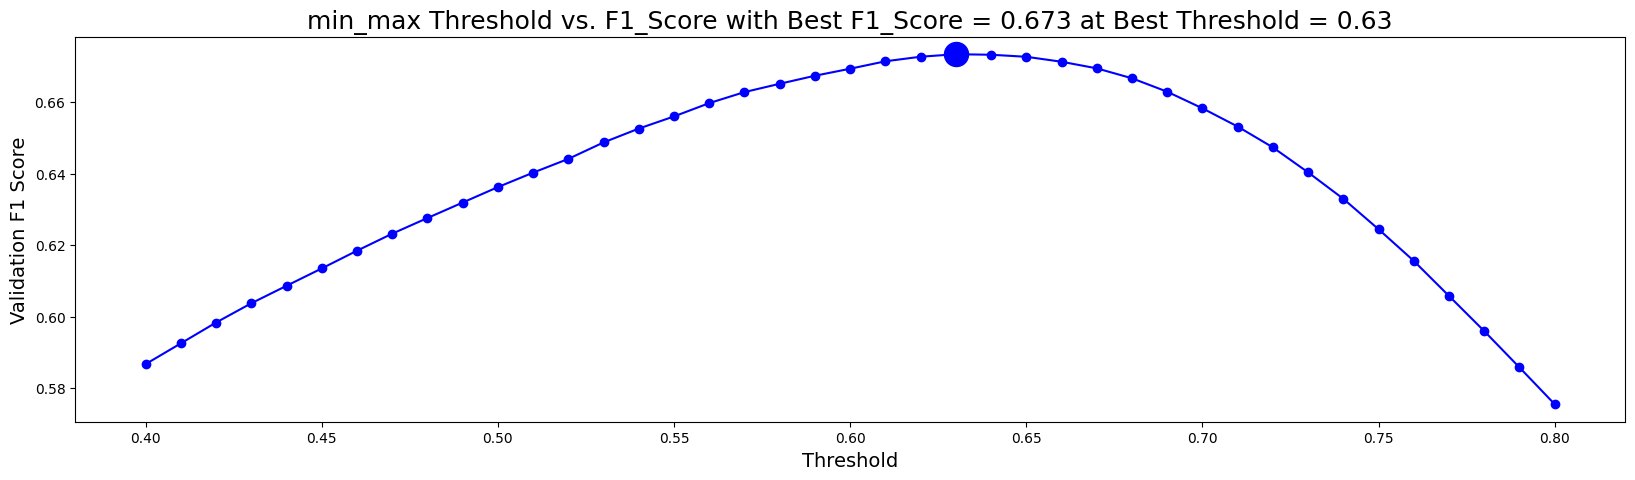

In [17]:
clf_mm.eval_()

In [18]:
clf_mm.f1()

When using optimal threshold...
Q1: F1 = 0.5807393635466955
Q2: F1 = 0.49464879356568364
Q3: F1 = 0.4829039195891674
Q4: F1 = 0.5844419326889521
Q5: F1 = 0.5744507188950527
Q6: F1 = 0.5887621470890181
Q7: F1 = 0.5758898877663851
Q8: F1 = 0.5455305166112894
Q9: F1 = 0.5878239896763389
Q10: F1 = 0.5031605932064541
Q11: F1 = 0.5871044893422439
Q12: F1 = 0.46961802871439445
Q13: F1 = 0.42025490871512233
Q14: F1 = 0.5979824256160262
Q15: F1 = 0.4826543660942638
Q16: F1 = 0.4621259846675471
Q17: F1 = 0.5286795653200188
Q18: F1 = 0.4872475626740947
==> Overall F1 = 0.6734621029405344
